In [1]:
import numpy as np
import matplotlib.pyplot as plt

def greedy_bandit(probs, num_iterations):
    num_actions = len(probs)
    rewards = np.zeros(num_actions)
    counts = np.zeros(num_actions)

    total_reward = 0
    regret = []

    for t in range(num_iterations):
        action = np.argmax(rewards)
        reward = np.random.binomial(1, probs[action])
        total_reward += reward
        regret.append(max(probs) - probs[action])

        counts[action] += 1
        rewards[action] += (reward - rewards[action]) / counts[action]

    return total_reward, np.cumsum(regret) / np.arange(1, num_iterations + 1)

def ucb1_bandit(probs, num_iterations):
    num_actions = len(probs)
    rewards = np.zeros(num_actions)
    counts = np.zeros(num_actions)

    total_reward = 0
    regret = []

    for t in range(num_iterations):
        ucb_values = rewards + np.sqrt(2 * np.log(t + 1) / (counts + 1e-6))
        action = np.argmax(ucb_values)
        reward = np.random.binomial(1, probs[action])
        total_reward += reward
        regret.append(max(probs) - probs[action])

        counts[action] += 1
        rewards[action] += (reward - rewards[action]) / counts[action]

    return total_reward, np.cumsum(regret) / np.arange(1, num_iterations + 1)

def thompson_sampling_bandit(probs, num_iterations):
    num_actions = len(probs)
    successes = np.zeros(num_actions)
    failures = np.zeros(num_actions)

    total_reward = 0
    regret = []

    for t in range(num_iterations):
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        action = np.argmax(sampled_theta)
        reward = np.random.binomial(1, probs[action])
        total_reward += reward
        regret.append(max(probs) - probs[action])

        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

    return total_reward, np.cumsum(regret) / np.arange(1, num_iterations + 1)

def test_algorithm(algorithm, probs, num_iterations, num_trials):
    total_rewards = np.zeros(num_trials)
    avg_regrets = np.zeros(num_iterations)

    for i in range(num_trials):
        total_reward, regrets = algorithm(probs, num_iterations)
        total_rewards[i] = total_reward
        avg_regrets += (regrets - avg_regrets) / (i + 1)

    return total_rewards.mean(), avg_regrets

In [2]:
# Test settings
bandit_settings = [
    (np.arange(0, 1.1, 0.1), "Eleven-armed bandit"),
    ([0.3, 0.5, 0.7, 0.83, 0.85], "Five-armed bandit")
]
algorithms = [greedy_bandit, ucb1_bandit, thompson_sampling_bandit]
num_iterations = [10**3, 10**4, 10**5]
num_trials = 100

# Run experiments
for probs, setting_name in bandit_settings:
    print(f"Testing on {setting_name}:")
    for algorithm in algorithms:
        print(f"Algorithm: {algorithm.__name__}")
        for iteration in num_iterations:
            total_reward_mean, avg_regrets = test_algorithm(algorithm, probs, iteration, num_trials)
            print(f"Iterations: {iteration}, Mean reward: {total_reward_mean}, Mean regret: {avg_regrets[-1]}")

Testing on Eleven-armed bandit:
Algorithm: greedy_bandit
Iterations: 1000, Mean reward: 0.0, Mean regret: 1.0
Iterations: 10000, Mean reward: 0.0, Mean regret: 1.0
Iterations: 100000, Mean reward: 0.0, Mean regret: 1.0
Algorithm: ucb1_bandit
Iterations: 1000, Mean reward: 846.12, Mean regret: 0.15328999999999926
Iterations: 10000, Mean reward: 9634.36, Mean regret: 0.03638260000000045
Iterations: 100000, Mean reward: 99418.14, Mean regret: 0.005800630000000247
Algorithm: thompson_sampling_bandit
Iterations: 1000, Mean reward: 986.08, Mean regret: 0.014254999999999999
Iterations: 10000, Mean reward: 9986.1, Mean regret: 0.0013903
Iterations: 100000, Mean reward: 99986.17, Mean regret: 0.0001377999999999999
Testing on Five-armed bandit:
Algorithm: greedy_bandit
Iterations: 1000, Mean reward: 299.48, Mean regret: 0.5500000000000044
Iterations: 10000, Mean reward: 3007.03, Mean regret: 0.5500000000001022
Iterations: 100000, Mean reward: 29998.07, Mean regret: 0.5500000000008705
Algorithm: 

Testing on Eleven-armed bandit:
Algorithm: greedy_bandit
Algorithm: ucb1_bandit
Algorithm: thompson_sampling_bandit


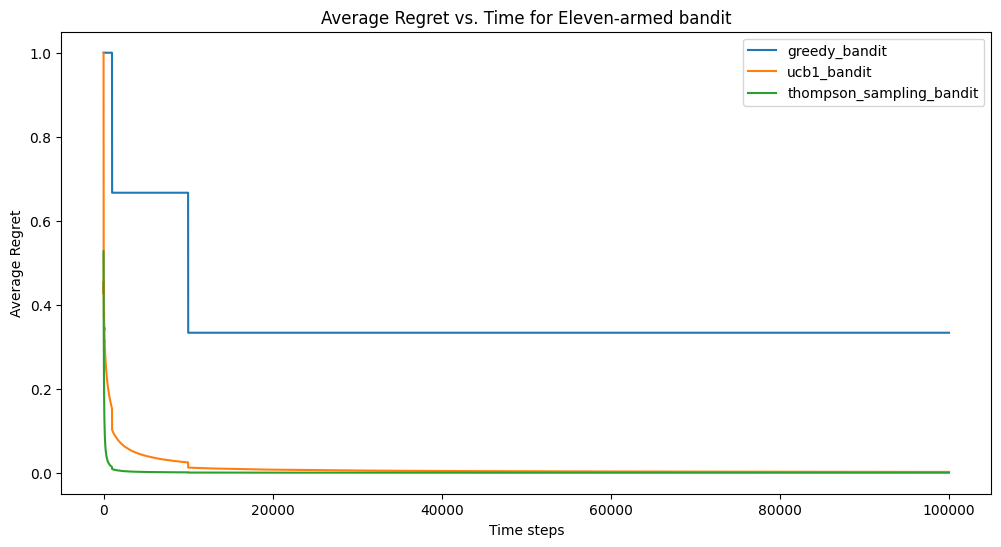

In [ ]:
def plot_results(algorithms, num_iterations, num_trials, bandit_settings):
    for probs, setting_name in bandit_settings:
        print(f"Testing on {setting_name}:")
        plt.figure(figsize=(12, 6))
        for algorithm in algorithms:
            print(f"Algorithm: {algorithm.__name__}")
            avg_regrets_over_iterations = np.zeros((len(num_iterations), num_iterations[-1]))
            for i, iteration in enumerate(num_iterations):
                _, avg_regrets = test_algorithm(algorithm, probs, iteration, num_trials)
                avg_regrets_over_iterations[i, :iteration] = avg_regrets
            avg_regrets_mean = np.mean(avg_regrets_over_iterations, axis=0)
            plt.plot(np.arange(1, num_iterations[-1] + 1), avg_regrets_mean, label=algorithm.__name__)
        plt.title(f"Average Regret vs. Time for {setting_name}")
        plt.xlabel("Time steps")
        plt.ylabel("Average Regret")
        plt.legend()
        plt.show()

        # Visualize action selection over time
        plt.figure(figsize=(12, 6))
        for algorithm in algorithms:
            action_selection_counts = np.zeros((len(probs), num_iterations[-1]))
            for _ in range(num_trials):
                action_selection = np.zeros(num_iterations[-1])
                for t in range(num_iterations[-1]):
                    action = algorithm(probs, num_iterations[-1])[0]
                    action_selection[t] = action
                for a in range(len(probs)):
                    action_selection_counts[a] += (action_selection == a).astype(int)
            avg_action_selection_counts = action_selection_counts / num_trials
            for a in range(len(probs)):
                plt.plot(np.arange(1, num_iterations[-1] + 1), avg_action_selection_counts[a], label=f"Action {a + 1} - {algorithm.__name__}")
        plt.title(f"Action Selection Over Time for {setting_name}")
        plt.xlabel("Time steps")
        plt.ylabel("Probability of Selection")
        plt.legend()
        plt.show()

# Run experiments and plot results
plot_results(algorithms, num_iterations, num_trials, bandit_settings)
